<a href="https://colab.research.google.com/github/aiswarya797/Memory-Augmented-Neural-Networks/blob/master/MemoryAugmentedAttentionNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Check the data input and output 
  * what is the embedding which needs to be used?
  * The output sizes can be different
  * In what way data has to be inputted?
* What is the loss function to be used?
* Is the memory to attention?

* References:

  -- https://github.com/tensorflow/docs/blob/master/site/en/r2/tutorials/sequences/nmt_with_attention.ipynb
  
  -- https://www.guru99.com/seq2seq-model.html

In [1]:
## Data Set Loader
import numpy as np
import random

def Convert(string): 
    list1=[] 
    list1[:0]=string 
    return list1 

def generate_seq(filename, write_in_file=False):
  character_sequence = []
  subword_sequence = []

  if(write_in_file):
    f = open("/media/aiswarya/New Volume/My_works/MANN/Model0/Data/SeqData.txt","w")
    
  file_ = open(filename, 'r') 
  lines = file_.readlines() 
  for line in lines:
    temp = line.split(':')
    if len(temp)<=2:
      t = line.split(',')
      temp = t[0].split(':')
    char_seq = temp[0].strip()
    subwrd_seq = temp[1].strip()
    subword_sequence.append(subwrd_seq)
    character_sequence.append(char_seq)
    if(write_in_file):
        f.write("%s\t%s\n"%(char_seq,subwrd_seq))
  if(write_in_file):
    f.close()
  return character_sequence,subword_sequence

def load_data(data_file):
    f = open(data_file)
    line = f.readline()
    X = []
    Y = []
    while line:
        info = line.strip("\n").split("\t")
        x = info[0]
        y = info[1]
        X.append(x)
        Y.append(y)
        line = f.readline()
    f.close()
    return X,Y

def train_test_split(X,Y, split_rat = 0.8):
  length = len(X)
  train_size = int(length*0.8)
  test_size = length-train_size
  X_train = X[0:train_size]
  Y_train = Y[0:train_size]
  X_test = X[train_size:]
  Y_test = Y[train_size:]

  return X_train, X_test, Y_train, Y_test

def find_distinct_tokens(data,separator, write_in_file, write = False):
  tok2ind = {}
  ind2tok = {}
  all_tok = []
  for d in data:
    info = d.split(separator)
    all_tok.extend(info)
    
  all_tok = list(set(all_tok))
  all_tok.sort()
  all_tok.extend(["<START>","<END>"])
  print("all_tok")
  if write:
    f = open(write_in_file,"w")
    for ind,item in enumerate(all_tok):
      tok2ind[item] = ind
      ind2tok[ind] = item
      f.write("%s\t%d\n"%(item,ind))
    f.close()
  else:
    for ind,item in enumerate(all_tok):
      tok2ind[item] = ind
      ind2tok[ind] = item
  return tok2ind,ind2tok

def load_tokens(token_file):
    f = open(token_file)
    line = f.readline()
    tok2ind = {}
    ind2tok = {}
    while line:
        info = line.strip("\n").split("\t")
        item = info[0]
        ind = int(info[1])
        tok2ind[item] = ind
        ind2tok[ind] = item
        line = f.readline()
    return tok2ind,ind2tok

def string2index(datestring,tok2ind,separator):
    components = datestring.split(separator)
    return [tok2ind[i] for i in components]

def batch_generator(x_data,y_data,batch_size,source_tok2ind,target_tok2ind):
    total = len(x_data)
    print('total : ', total)
    start = 0
    # i = 0
    while True:
        end = min(start + batch_size , total)
        X = x_data[start:end]
        Y = y_data[start:end]
        batch_x = []
        batch_y = []
        for bx,by in zip(X,Y):
            bx = string2index(bx,source_tok2ind,"-")
            by = string2index(by,target_tok2ind,",")
            batch_x.append(bx)
            batch_y.append(by)
        yield np.asarray(batch_x),np.asarray(batch_y),start,end
        # print(np.asarray(batch_x), '  ',np.asarray(batch_y),'  ', start, '  ', end)
        start = end
        if(start >= total):
            start = 0
            
        # i+=1
    # return np.asarray(batch_x), np.asarray(batch_y)

## Test ##
"""
X,Y = generate_seq("drive/My Drive/AttentionModel/datafile.txt", False)
print(len(X))
print(len(Y))

print(X[160], '      ', Y[160])
print(X[1010], '     ', Y[1010])
print(X[10], '      ', Y[10])
print(X[234], '     ', Y[234])
print(X[513], '      ', Y[513])
print(X[798], '     ', Y[798])

ST, SI = find_distinct_tokens(X, '-', "", False)
TT,TI = find_distinct_tokens(Y, ',', "", False)
bx, by = batch_generator(X,Y,5,ST,TT)
bx = np.array(bx).flatten().tolist()
by = np.array(by).flatten().tolist()

for i in range(len(bx)):
  print(bx[i])
  print(SI[bx[i]])

for i in range(len(by)):
  print(by[i])
  for j in range(len(by[i])):
    y = by[i][j]
    print(TI[y])
"""
### OUTPUT ###
"""
188749
188749
शही        शही
गधा       ग,धा
पौढ़        पौ,ढ़
थ्र       थ्र
जाय        जाय
हौं       हौ,ं
all_tok
all_tok
total :  188749
109714
बस
184335
०
39670
खचा
145053
लिया।
49826
चकी
[3617]
बस
[6064]
०
[1325, 1675]
ख
चा
[4651, 5938]
लिय
ा
[1634, 1133]
च
की

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
"""

"\n188749\n188749\nशही        शही\nगधा       ग,धा\nपौढ़        पौ,ढ़\nथ्र       थ्र\nजाय        जाय\nहौं       हौ,ं\nall_tok\nall_tok\ntotal :  188749\n109714\nबस\n184335\n०\n39670\nखचा\n145053\nलिया।\n49826\nचकी\n[3617]\nबस\n[6064]\n०\n[1325, 1675]\nख\nचा\n[4651, 5938]\nलिय\nा\n[1634, 1133]\nच\nकी\n\n/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray\n  return array(a, dtype, copy=False, order=order)\n"

In [2]:
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
import os
REDUCE = 1

physical_devices = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)
if(physical_devices):
    tf.config.experimental.set_virtual_device_configuration(physical_devices[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input,LSTM,Reshape,Conv2D,Flatten, GRU

In [4]:
class Encoder(tf.keras.Model):

    def __init__(self, enc_units, vocab_size, embedding_dim=32, nb_layers=3):
        super(Encoder, self).__init__()
        self.enc_units = enc_units
        self.nb_layers = nb_layers
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.all_layers = []
        for l in range(self.nb_layers):
            layer = tf.keras.layers.GRU(self.enc_units, return_sequences=True,
                                        return_state=True, recurrent_initializer='glorot_uniform', dropout=0.2)
            self.all_layers.append(layer)

    def call(self, inputs, training=None, mask=None):
        x = self.embedding(inputs)
        for l in range(len(self.all_layers)):
            output, state = self.all_layers[l](x)
            x = output
        return output, state

    def initialize_hidden_state(self, batch_size):
        return tf.zeros((batch_size, self.enc_units))

In [5]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, query, values):
        hidden_with_time_axis = tf.expand_dims(query, 1)
        score = self.V(tf.nn.tanh(
            self.W1(values) + self.W2(hidden_with_time_axis)))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

In [6]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units,memory_size= 20,memory_vector_dim= 4,head_num= 2, nb_layers=3):
        super(Decoder, self).__init__()
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.nb_layers = nb_layers
        self.all_layers = []
        for i in range(self.nb_layers):
          layer = GRU(units=128,return_sequences=True, return_state=True, recurrent_initializer='glorot_uniform', dropout=0.2)
          self.all_layers.append(layer)
        self.fc = tf.keras.layers.Dense(vocab_size)
        self.memory_size = memory_size
        self.memory_vector_dim = memory_vector_dim
        self.head_num = head_num
        self.gamma = 0.95
        self.reuse = True

        # used for attention
        self.attention = BahdanauAttention(self.dec_units)
  
    def read_head_addressing(self, k, prev_M):    

        # print('k shape : ', k.shape)
        k = tf.expand_dims(k, axis=3)
        # print('expand k shape : ', k.shape)
        # print('M shape : ', prev_M.shape)
        inner_product = tf.matmul(prev_M, k)
        # print('inner pd shape : ', inner_product.shape)
        k_norm = tf.sqrt(tf.reduce_sum(tf.square(k), axis=2, keepdims=True))
        # print('k norm shape : ', k_norm.shape)
        M_norm = tf.sqrt(tf.reduce_sum(tf.square(prev_M), axis=3, keepdims=True))
        # print('M norm shape : ', M_norm.shape)
        norm_product = M_norm * k_norm
        # print('norm pd shape : ', norm_product.shape)
        K = tf.expand_dims(tf.expand_dims(tf.squeeze(inner_product / (norm_product + 1e-8)), axis = 0), axis=0)
        # print('K squeeze shape : ', K.shape)                
        K_exp = tf.exp(K)
        w = K_exp / tf.reduce_sum(K_exp, axis=1, keepdims=True)    
        # print('w shape : ', w.shape)                   
        
        return w

    #weight vector for write operation
    def write_head_addressing(self,sig_alpha, prev_w_r_list, prev_w_lu):
        prev_w_r = prev_w_r_list[-1]
        return sig_alpha * prev_w_r + (1. - sig_alpha) * prev_w_lu     

    #least used weight vector
    def least_used(self,w_u):
        _, indices = tf.nn.top_k(w_u, k=self.memory_size)
        w_lu = tf.reduce_sum(tf.one_hot(indices[:, -self.head_num:], depth=self.memory_size), axis=2)
        return indices, w_lu


    #next we define the function called zero state for initializing all the states - 
    #controller state, read vector, weights and memory
    def zero_state(self,batch_size,dtype):
        one_hot_weight_vector = np.zeros([batch_size,1, self.memory_size])
        one_hot_weight_vector[..., 0] = 1
        one_hot_weight_vector = tf.constant(one_hot_weight_vector, dtype=tf.float32)
        with tf.compat.v1.variable_scope('init', reuse=self.reuse):
            state = {
                'read_vector_list': [tf.zeros([batch_size,1, self.memory_vector_dim])
                                      for _ in range(self.head_num)],
                'w_r_list': [one_hot_weight_vector for _ in range(self.head_num)],
                'w_u': one_hot_weight_vector,
                'M': tf.constant(np.ones([batch_size,1, self.memory_size, self.memory_vector_dim]) * 1e-6, dtype=tf.float32)
            }
            return state

    def call(self, x, hidden, enc_output, prev_state):
        # enc_output shape == (batch_size, max_length, hidden_size)
        context_vector, attention_weights = self.attention(hidden, enc_output) #(batch_size, hidden_size)
        prev_read_vector_list = prev_state['read_vector_list']
        context_vector = tf.reshape(context_vector, (context_vector.shape[0], 1, context_vector.shape[1]))
        context_vector = tf.concat([context_vector] + prev_read_vector_list, axis=-1)
        
        # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(x)
        # print('embedded x shape : ', x.shape)

        # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size +prev_read_size)
        x = tf.concat([context_vector, x], axis=-1)
        # print('final x shape : ', x.shape)
        
        # passing the concatenated vector to the GRU
        layer_output = x
        for l in range(len(self.all_layers)):

            output, state = self.all_layers[l](layer_output)
            layer_output = output

        network = Sequential()
        network.add(LSTM(units=128,activation='tanh',return_sequences=True))
        layer_output = network(layer_output)

        
        num_parameters_per_head = self.memory_vector_dim + 1
        total_parameter_num = num_parameters_per_head * self.head_num
        
        #Initiliaze weight matrix and bias and compute the parameters
        weights = tf.Variable(tf.random.normal([layer_output.get_shape()[0],layer_output.get_shape()[2], total_parameter_num], stddev=0.35))
        # print('weights para : ', weights.shape)
        biases = tf.Variable(tf.zeros([total_parameter_num]))
        parameters = tf.compat.v1.nn.xw_plus_b(layer_output, weights, biases)
        # print('parameters : ', parameters.shape)
        head_parameter_list = tf.split(parameters, self.head_num, axis=2)
        # print('head parameter list : ', np.array(head_parameter_list).shape)
        
        
        #previous read weight vector
        prev_w_r_list = prev_state['w_r_list']   
        # print('w_r weights : ', prev_w_r_list[1].shape)
        
        #previous memory
        prev_M = prev_state['M']
        # print('memory : ', prev_M.shape)
        
        #previous usage weight vector
        prev_w_u = prev_state['w_u']
        # print('usage weights : ', prev_w_u.shape)
        
        #previous index and least used weight vector
        prev_indices, prev_w_lu = self.least_used(prev_w_u)
        
        #read weight vector
        w_r_list = []
        
        #write weight vector
        w_w_list = []
        
        #key vector
        k_list = []
    
        #now, we will initialize some of the important parameters that we use for addressing.     
        for i, head_parameter in enumerate(head_parameter_list):
            with tf.compat.v1.variable_scope('addressing_head_%d' % i):
                
                #key vector
                k = tf.tanh(head_parameter[:,:, 0:self.memory_vector_dim], name='k')

                #sig_alpha
                sig_alpha = tf.sigmoid(head_parameter[:,:, -1:], name='sig_alpha')
                
                #read weights
                w_r = self.read_head_addressing(k, prev_M)
                
                #write weights
                w_w = self.write_head_addressing(sig_alpha, prev_w_r_list[i], prev_w_lu)
           
            w_r_list.append(w_r)
            w_w_list.append(w_w)
            k_list.append(k)
            
        # print('new w_R : ', w_r_list[0].shape)
        #usage weight vector 
        w_u = self.gamma * prev_w_u + tf.add_n(w_r_list) + tf.add_n(w_w_list)   

        #update the memory
        M_ = prev_M * tf.compat.v1.expand_dims(1. - tf.one_hot(prev_indices[:,:, -1], self.memory_size), dim=3)
        
        #write operation
        M = M_
        with tf.compat.v1.variable_scope('writing'):
            for i in range(self.head_num):
                
                w = tf.expand_dims(w_w_list[i], axis=3)
                k = tf.expand_dims(k_list[i], axis=2)
                M = M + tf.matmul(w, k)

        #read opearion
        read_vector_list = []
        with tf.compat.v1.variable_scope('reading'):
            for i in range(self.head_num):
                read_vector = tf.reduce_sum(tf.compat.v1.expand_dims(w_r_list[i], dim=3) * M, axis=2)
                read_vector_list.append(read_vector)       

        
        #controller output
        new_state = {
            'read_vector_list': read_vector_list,
            'w_r_list': w_r_list,
            'w_w_list': w_w_list,
            'w_u': w_u,
            'M': M,
        }

        # output shape == (batch_size * 1, hidden_size)
        output = tf.reshape(output, (-1, output.shape[2]))

        # output shape == (batch_size, vocab)
        x = self.fc(output)

        return x, state, attention_weights, new_state

In [7]:
class Seq2SeqMANN:
    def __init__(self, name, in_vocab_size, out_vocab_size, embedding_dim, units, batch_size):
        self.name = name
        self.units = units
        self.batch_size = batch_size
        self.encoder = Encoder(units, in_vocab_size)
        print("Encoder Dimensions ", self.encoder)
        self.decoder = Decoder(out_vocab_size, embedding_dim, units)
        self.decoder_state = self.decoder.zero_state(self.batch_size, tf.float32)
        print("Decoder Dimensions ", self.decoder)
        self.optimizer = tf.keras.optimizers.Adam(
            0.0001)  # tf.keras.optimizers.RMSprop(0.0001)
        self.saver = tf.train.Checkpoint(
            encoder=self.encoder, decoder=self.decoder, optimizer=self.optimizer)
        self.save_dir = "drive/My Drive/AttentionModel/Weights/"+self.name+".ckpt"
        self.weight_manager = tf.train.CheckpointManager(
            self.saver, self.save_dir, max_to_keep=2)
        self.loss_list = []

    def loss_function(self, pred, real):

        loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
            from_logits=True, reduction='none')

        loss_ = loss_object(real, pred)
        return tf.reduce_mean(loss_)

    def train_step(self, inp, targ, start_index, end_index):
        loss = 0
        batch_size = inp.shape[0]

        pred_output = []

        with tf.GradientTape() as tape:
            enc_output, enc_hidden = self.encoder(inp)
            dec_hidden = enc_hidden
            dec_input = tf.expand_dims([start_index] * batch_size,1)  #start index = index of <START>
            # Teacher forcing - feeding the target as the next input
            # print('targ :', targ.shape)
            # print('targ,shape[1] : ', targ.shape[1])
            for t in range(0, targ.shape[1]):
                # passing enc_output to the decoder
                prediction, dec_hidden, att_wt, state = self.decoder(dec_input, dec_hidden, enc_output, self.decoder_state)
                loss += self.loss_function(prediction, targ[:, t])
                self.decoder_state = state
                # using teacher forcing
                dec_input = tf.expand_dims(targ[:, t], 1) #tf.math.argmax(prediction), 1)
                # if(target[t] == end_index):
                #   break
        
        # batch_loss = (loss / int(targ.shape[1]))
        variables = self.encoder.trainable_variables + self.decoder.trainable_variables
        gradients = tape.gradient(loss, variables)
        self.optimizer.apply_gradients(zip(gradients, variables))
        self.loss_list.append(loss) 
        return loss

    def gnrl(self, inp, targ, start_index, max_length, target_ind2tok):
        enc_output, enc_hidden = self.encoder(inp)
        dec_hidden = enc_hidden
        dec_input = tf.expand_dims([start_index] * self.batch_size,1)  #start index = index of <START>

        result = ''
        for t in range(max_length):
            prediction, dec_hidden, attention_weights, state = self.decoder(dec_input, dec_hidden, enc_output, self.decoder_state)
            # storing the attention weights to plot later on
            attention_weights = tf.reshape(attention_weights, (-1,))
            # attention_plot[t] = attention_weights.numpy()

            predicted_id = tf.math.argmax(input = prediction).numpy()
            
            max = -1
            for i in predicted_id:
              if(max<i):
                max = i

            predicted_id = max
            print('Predicted ID : ', predicted_id)
            result += target_ind2tok[predicted_id] + ' '

            if target_ind2tok[predicted_id] == '<END>':
                return result, targ#, attention_plot

            # the predicted ID is fed back into the model
            dec_input = tf.expand_dims([predicted_id], 0)

        return result, targ#, attention_plot


    def train(self, X, Y, source_tok2ind, target_ind2tok, target_tok2ind, epochs):
        restore_from = tf.train.latest_checkpoint(self.save_dir)
        self.saver.restore(restore_from)
        print('Weights restored from %s' % restore_from)

        total = len(X)
        batches = batch_generator(X, Y, self.batch_size,
                                    source_tok2ind, target_tok2ind)
        nbbatches = int(np.ceil(total / float(self.batch_size)))
        print("Ready to generate batches: Total %d #Batches %d" %
                (total, nbbatches))
        best_loss = np.inf
        print('epochs', epochs)
        i = 1
        print('Iteration : ', i)
        for e in range(epochs):
            total_loss = 0
            for b in range(nbbatches):
                batch_x, batch_y, start, end = next(batches)
                if batch_x.shape[0] == self.batch_size:
                  b_loss = self.train_step(
                      batch_x, batch_y, start_index=target_tok2ind['<START>'], end_index=target_tok2ind['<END>'])
                  total_loss += b_loss
                i+=1
                if i%50==0:
                  t = np.arange(0,i-1,1)
                  plt.plot(self.loss_list, t)
                  plt.show()
                if i%10==0:
                    self.predict(batch_x, batch_y, target_tok2ind['<START>'], 5,source_ind2tok, target_ind2tok)
                    print('Iteration : ', i)
                    print('Loss : ', b_loss)
            total_loss = total_loss/nbbatches
            print("\tEpoch %d/%d Loss %0.4f" % (e+1, epochs, total_loss))
            if(total_loss < best_loss):
                self.weight_manager.save()
                best_loss = total_loss
                print("--------------New Best State-----------------")

    def predict(self, inp, targ, start_index, max_length, source_ind2tok, target_ind2tok):

        # print(inp)
        result, targ = self.gnrl(inp, targ, start_index, max_length, target_ind2tok)
        # print('Input: ', source_ind2tok[inp[0][0]])
        print('Predicted translation: {}'.format(result))

all_tok
all_tok
$िकताबें
Nc Out :  6224
Nc In :  185457
Encoder Dimensions  <__main__.Encoder object at 0x7f771a71d7d0>
Decoder Dimensions  <__main__.Decoder object at 0x7f771816e790>
Weights restored from None
Ready to generate batches: Total 150999 #Batches 150999
epochs 50
Iteration :  1
total :  150999
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted translation:      
Iteration :  10
Loss :  tf.Tensor(17.472015, shape=(), dtype=float32)
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted translation:      
Iteration :  20
Loss :  tf.Tensor(17.471066, shape=(), dtype=float32)
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted translation:      
Iteration :  30
Loss :  tf.Tensor(8.73604, shape=(), dtype=float32)
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted translation:      
Iteratio

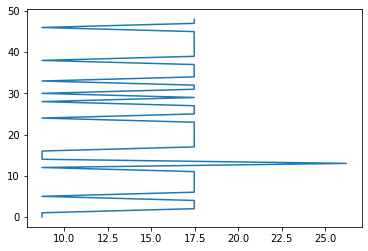

Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted translation:      
Iteration :  50
Loss :  tf.Tensor(17.471035, shape=(), dtype=float32)
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted translation:      
Iteration :  60
Loss :  tf.Tensor(17.465855, shape=(), dtype=float32)
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted translation:      
Iteration :  70
Loss :  tf.Tensor(17.458965, shape=(), dtype=float32)
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted translation:      
Iteration :  80
Loss :  tf.Tensor(17.45842, shape=(), dtype=float32)
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted translation:      
Iteration :  90
Loss :  tf.Tensor(26.200394, shape=(), dtype=float32)


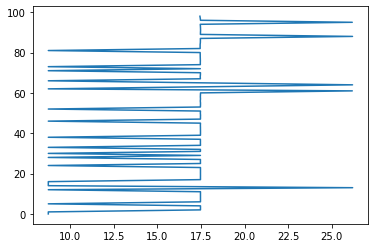

Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted translation:      
Iteration :  100
Loss :  tf.Tensor(17.440378, shape=(), dtype=float32)
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted translation:      
Iteration :  110
Loss :  tf.Tensor(17.46861, shape=(), dtype=float32)
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted translation:      
Iteration :  120
Loss :  tf.Tensor(17.441114, shape=(), dtype=float32)
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted ID :  0
Predicted translation:      
Iteration :  130
Loss :  tf.Tensor(17.440594, shape=(), dtype=float32)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-3673f2d84efa>", line 18, in <module>
    network.train(X_train, Y_train, source_tok2ind, target_ind2tok, target_tok2ind, 50)
  File "<ipython-input-7-6817112ceec8>", line 111, in train
    batch_x, batch_y, start_index=target_tok2ind['<START>'], end_index=target_tok2ind['<END>'])
  File "<ipython-input-7-6817112ceec8>", line 43, in train_step
    prediction, dec_hidden, att_wt, state = self.decoder(dec_input, dec_hidden, enc_output, self.decoder_state)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py", line 1012, in __call__
    outputs = call_fn(inputs, *args, **kwargs)
  File "<ipython-input-6-4ebf93ce2199>", line 94, in call
    network.add(LSTM(units=128,activation='tanh',return_sequences=True))
  File "/usr/local/lib/python

KeyboardInterrupt: ignored

In [8]:
X, Y = generate_seq("drive/My Drive/AttentionModel/datafile.txt", False)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

source_tok2ind, source_ind2tok = find_distinct_tokens(X, '-', write_in_file="/media/aiswarya/New Volume/My_works/MANN/Model0/Data/source_tokens.txt", write=False)
target_tok2ind, target_ind2tok = find_distinct_tokens(Y, ',',  write_in_file="/media/aiswarya/New Volume/My_works/MANN/Model0/Data/target_tokens.txt", write=False)

print(source_ind2tok[0])

Nc_out = len(target_tok2ind)
print('Nc Out : ', Nc_out)
Nc_in = len(source_tok2ind)
print('Nc In : ', Nc_in)

network = Seq2SeqMANN('MANN', Nc_in, Nc_out, embedding_dim=32, units=128, batch_size=1)

# train network 
network.train(X_train, Y_train, source_tok2ind, target_ind2tok, target_tok2ind, 50)
# network.test(X_tes

In [ ]:
%debug

> <string>(5)raise_from()

ipdb> k
*** NameError: name 'k' is not defined
ipdb> M
*** NameError: name 'M' is not defined
ipdb> quit
